<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 부분요인배치 (Fractional Factorial Design)
- 요인배치는 요인 수가 많아질수록 실험수는 빠르게 증가함
- 고차원의 교호작용을 무시할 수 있다면, 저차원의 교호작용과 main effect를 구할 수 있는 일부 실험만 진행하면 실험 수를 줄일 수 있음
- 다음의 3가지를 통해 FFD를 성공적으로 사용할 수 있음


1.   Sparsity of effects : 고차원 교호작용 factor를 제거
2.   Projection property : FD보다 더 적은 요인으로 설계
3.   Sequential experiment : 해석이 어려울 수 있기 때문에 각 fractional마다 실험수를 추가


## One-Half FFD
- $2^k$ Factorial Design이 있다면 One-Half FFD는 $2^{k-1}$ FFD가 된다
- 2^3 FD라면 8개의 요인조합에 대해서 실험을 진행하지만 2^2 FFD는 4개의 요인조합에 대해서만 진행하게 된다
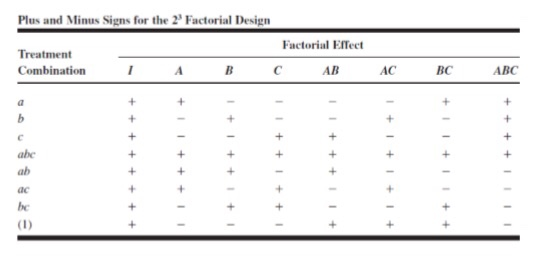

- 표와 같이 가장 고차원인 abc에 대해서 같은 '+' 부호인 a,b,c,abc를 제외하고 (1),ab,ac,bc에 대해서만 진행하게 된다
- 완전요인배치에 비하여 실험 수를 줄일 수 있는 장점이 있으나 특정 main effec와 interaction effect는 값이 합쳐져 있어 개별 효과를 알 수 없는 교락 상태가 발생한다는 단점이 있음
- 예를 들어 위의 표와 같이 + 표시가 되어있는 a,b,c,abc에 대해서 실험을 수행한다면 a의 effect는 $\frac{abc+a-b-c}{2}$이다. 그런데 bc의 effect도
계산헤보면 $\frac{abc+a-b-c}{2}$로 a와 동일한데 a와 bc의 effect가 합쳐져 분리할 수 없음을 의미한다.
- 즉, A의 effect를 추정하는 것이 아닌 A + BC의 effect를 추정하게 되는 것이다

### 기본 설계 방법
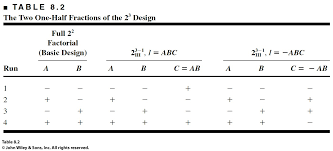-

- 위의 예제를 설명해보면, $2^3$ FD를 완전히 수행할 수 없을때 one half fractional ffd는 $2^2$ FD를 진행하면서 동시에 C 요인을 A,B의 interaction effect factor로 정의한다
- 총 2개의 Fraction을 구성해야 함


1.   principal fraction : I = ABC로 정의되어 C = AB가 된다
2.   complementary fraction : I = -ABC로 정의되어 C = -AB가 된다



In [4]:
# 예제
import pandas as pd

df = pd.DataFrame(
    {"t" : ["-","+","-","+","-","+","-","+"],
     "p" : ["-","-","+","+","-","-","+","+"],
     'f' : ["-","-","-","-","+","+","+","+",],
     's' : ["-","+","+","-","+","-","-","+"],
     'treatment_comb' : ["(1)","ab","bd","ab","cd","ac","bc","abcd"],
     'filteration_rate' : [45,100,45,65,75,60,80,96]}
)
df

,t,p,f,s,treatment_comb,filteration_rate
0,-,-,-,-,(1),45
1,+,-,-,+,ab,100
2,-,+,-,+,bd,45
3,+,+,-,-,ab,65
4,-,-,+,+,cd,75
5,+,-,+,-,ac,60
6,-,+,+,-,bc,80
7,+,+,+,+,abcd,96


In [33]:
import pandas as pd
import numpy as np
from patsy import dmatrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import product

# --- 데이터 준비 (이전과 동일) ---
factors = {'A': [-1, 1], 'B': [-1, 1], 'C': [-1, 1]}
dat8_1 = pd.DataFrame(list(product(*factors.values())), columns=factors.keys())
dat8_1['D'] = dat8_1[['A', 'B', 'C']].prod(axis=1)
dat8_1['y'] = [45, 100, 45, 65, 75, 60, 80, 96]
N = len(dat8_1) # 전체 실험 횟수 (8)

# --- 효과(Effect) 계산 ---

# 1. 대비(Contrast)를 계산하기 위한 설계 행렬 생성
# R: cont <- model.matrix( ~ -1 + A * B * C * D, data=dat8_1)
# D는 A:B:C와 별명(alias) 관계입니다.
formula_cont = "~ -1 + A + B + C + D + A:B + A:C + B:C "
cont = dmatrix(formula_cont, data=dat8_1, return_type='dataframe')
cont

,A,B,C,D,A:B,A:C,B:C
0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
1,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
3,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
6,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
dat8_1

,A,B,C,D,y
0,-1,-1,-1,-1,45
1,-1,-1,1,1,100
2,-1,1,-1,1,45
3,-1,1,1,-1,65
4,1,-1,-1,1,75
5,1,-1,1,-1,60
6,1,1,-1,-1,80
7,1,1,1,1,96


- B의 effect가 상대적으로 약한 것을 확인할 수 있음
-

In [30]:
# 2. 효과 벡터 계산
# R: eff_vec <- (dat8_1$y %*% cont[,1:7]) / 4
y_vec = dat8_1['y'].values
eff_vec = (y_vec @ cont) / 4

print("### 계산된 전체 요인 효과 ###")
print(eff_vec)

### 계산된 전체 요인 효과 ###
A      14.0
B       1.5
C      19.0
D      16.5
A:B    19.0
A:C   -18.5
B:C    -1.0
dtype: float64
